## 实验目的
1. 分别收集尽量多的英语和汉语文本
2. 计算这些文本中英语字母和汉字的熵，对比本章课件第18页上表中给出的结果

|  | |

3. 逐步扩大文本规模，如每次增加固定的数量，如2M/5M等，重新计算文本规模扩大之后的熵，分析多次增加之后熵的变化情况

## 实验过程

### 爬取数据

#### 中文数据
运行以下命令：
```bash
cd xinhua-crawler
scrapy crawl news_spider -s OUTPUT_DIR="../data/cn" -a language="cn" -a start_keyword="1" -s KEEP_PUNC="False" -s CLOSESPIDER_ITEMCOUNT=50000
```

#### 英文数据

### 数据分析

#### 计算信息熵

In [4]:
import json
from tqdm import tqdm
from utils.cleaning import keep_only_cnchr, keep_only_alpha
from utils.entropy import cal_entropy

with open("data/cn/data.json") as f:
    cn_news_list: list[str] = [news['content'] for news in tqdm(json.load(f), desc="Reading CN News")]

cn_chrs = [chr for news in tqdm(cn_news_list, desc='Concatenating') for chr in keep_only_cnchr(news)]
print(f"中文数据总字数为：{len(cn_chrs)}")
print(f"中文信息熵为：{cal_entropy(cn_chrs)}")

with open("data/en/data.json") as f:
    en_news_list: list[str] = [news['content'] for news in tqdm(json.load(f), desc="Reading EN News")]
    
en_chrs = [chr for news in tqdm(en_news_list, desc='Concatenating') for chr in keep_only_alpha(news)]
print(f"英文数据总字母数为：{len(en_chrs)}")
print(f"英文信息熵为：{cal_entropy(en_chrs)}")

Concatenating: 100%|██████████| 45497/45497 [00:03<00:00, 12485.41it/s]


中文数据总字数为：41403562
Counting data...


Calculating Entropy: 100%|██████████| 6386/6386 [00:00<00:00, 3648661.67it/s]


中文信息熵为：9.75360458234057


Concatenating: 100%|██████████| 98222/98222 [00:08<00:00, 11754.72it/s]


英文数据总字母数为：142729487
Counting data...


Calculating Entropy: 100%|██████████| 52/52 [00:00<00:00, 541200.52it/s]

英文信息熵为：4.459872445620524


计算中文数据中每个汉字的信息熵。每次增加3M数据量，画出计算结果随数据量的变化。

Calculating Entropy Curve: 100%|██████████| 14/14 [00:04<00:00,  3.18it/s]


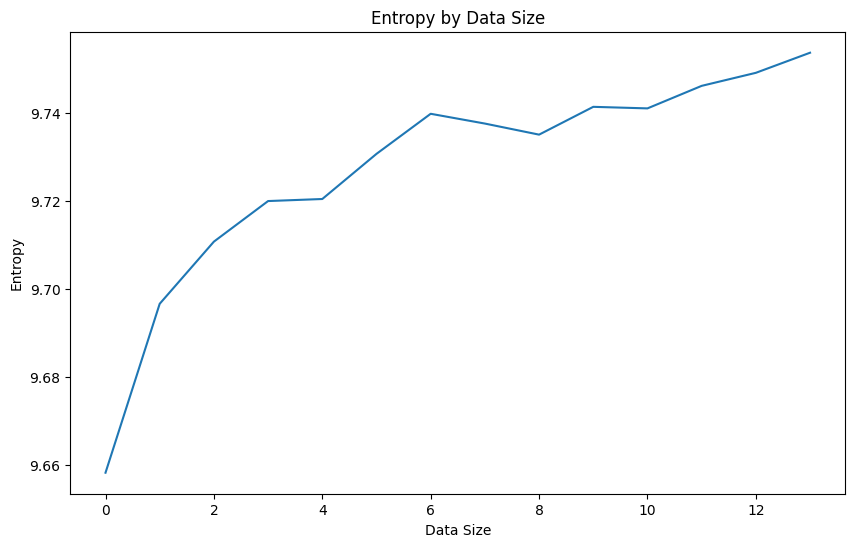

Calculating Entropy Curve: 100%|██████████| 48/48 [00:06<00:00,  7.68it/s]


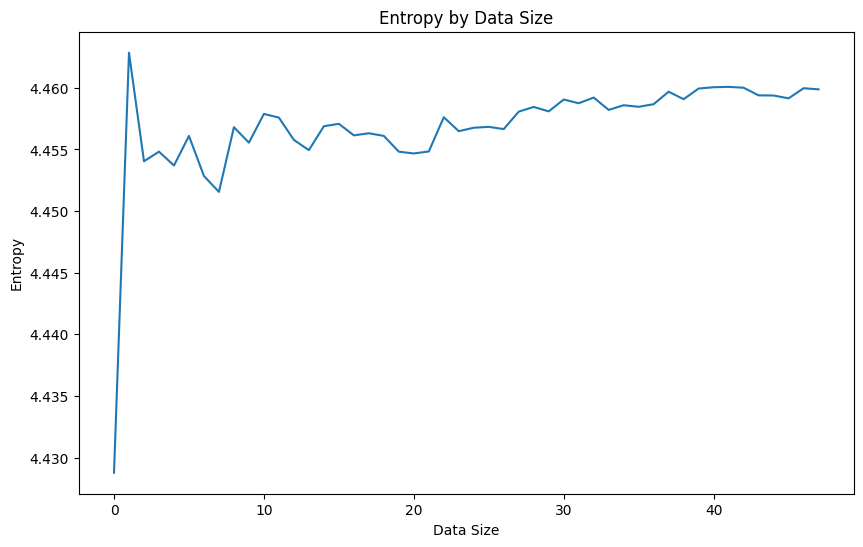

In [5]:
import matplotlib.pyplot as plt
from utils.entropy import entropy_curve

# 得到中英文数据的信息熵曲线
fig1 = entropy_curve(cn_chrs, 3_000_000)
fig2 = entropy_curve(en_chrs, 3_000_000)

In [10]:
from utils.tokenization import tokenize_cn, tokenize_en

cn_tokenized_sentences = [token for news in tqdm(cn_news_list, desc='Tokenizing') for token in tokenize_cn(news, only_cnchr=True)]
cn_tokens = [token for sentence in cn_tokenized_sentences for token in sentence]
print(f"中文数据总词数为：{len(cn_tokens)}")
print(f"中文词信息熵为：{cal_entropy(cn_tokens)}")

en_tokenized_sentences = [token for news in tqdm(en_news_list, desc='Tokenizing') for token in tokenize_en(news, only_alpha=True)]
en_tokens = [token for sentence in en_tokenized_sentences for token in sentence]
print(f"英文数据总词数为：{len(en_tokens)}")
print(f"英文词信息熵为：{cal_entropy(en_tokens)}")

Tokenizing: 100%|██████████| 45497/45497 [02:34<00:00, 295.27it/s]


中文数据总词数为：21370005
Counting data...


Calculating Entropy: 100%|██████████| 274886/274886 [00:00<00:00, 3624882.33it/s]


中文词信息熵为：12.617820727547258


Tokenizing: 100%|██████████| 98222/98222 [00:33<00:00, 2913.75it/s]


英文数据总词数为：27103051
Counting data...


Calculating Entropy: 100%|██████████| 133444/133444 [00:00<00:00, 3666756.44it/s]

英文词信息熵为：10.676914172183697
